In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# Create toy data 
x = np.arange(0, 10, 0.25)
y = x + (np.random.rand(len(x)) * 10)

# Extend x data to contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

In [3]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

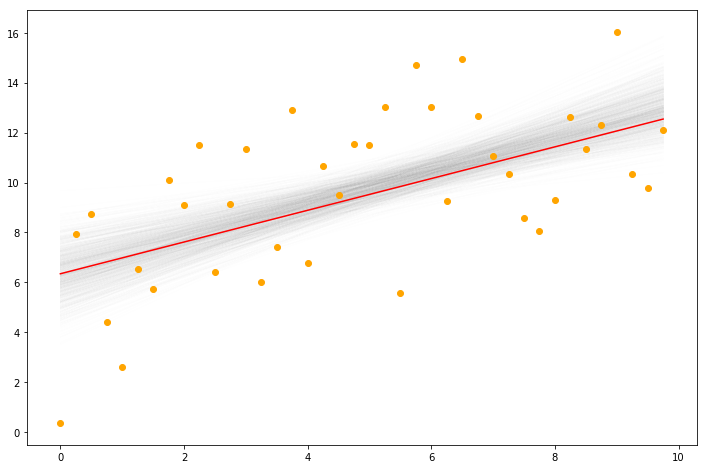

In [4]:
plt.figure(figsize=(12,8))
nboot = 1000
for i in range(0, nboot):
    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sample_index]
    y_samples = y[sample_index]    

    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(x, lr.predict(X), color='grey', alpha=3.0 / nboot, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)
plt.plot(x, lr.predict(X), color='red', zorder=5)

In [5]:
import py3Dmol
view = py3Dmol.view(query='pdb:1ubq')